# SciPy 的一个完整的小教程

## 1、scipy 简介

**scipy** 简写自 **scientific python** .

**Ipython** 提供了一个很好的解释器界面。

**Matplotlib** 提供了一个类似 **Matlab** 的画图工具。

**Numpy** 提供了 **ndarray** 对象，可以进行快速的向量化计算。

**Scipy** 是 Python 中进行科学计算的一个第三方库，以 **Numpy** 为基础。

**Pandas** 是处理时间序列数据的第三方库，提供一个类似 R 语言的环境。

**StatsModels** 是一个统计库，着重于统计模型。

**Scikits** 以 **Scipy** 为基础，提供如 **scikits-learn** 机器学习和 **scikits-image** 图像处理等高级用法。

**Scipy** 是由不同科学计算领域的子模块组成：

![](img/sci_1.png)

它们全依赖 numpy ，但是每个之间基本独立。导入 Numpy 和 这些 scipy 模块的标准方式是：

```python
import numpy as np
from scipy import stats # 其他子模块类似
```

scipy 包含致力于科学计算中常见问题的各个工具箱。它的不同子模块相应于不同的应用。像插值，积分，优化，图像处理，统计，特殊函数等等。

scipy 可以与其它标准科学计算程序库进行比较，比如 GSL(GNU C或C++科学计算库)，或者 Matlab 工具箱。scipy 是 Python 中科学计算程序的核心包; 它用于有效地计算 numpy 矩阵，来让 numpy 和 scipy 协同工作。

在实现一个程序之前，值得检查下所需的数据处理方式是否已经在scipy中存在了。作为非专业程序员，科学家总是喜欢重新发明造轮子，导致了充满漏洞的，未经优化的，很难分享和维护的代码。相反，Scipy程序经过优化和测试，因此应该尽可能使用。

注：我们的教程距离最终真正的数值计算介绍还很远。因为如果我们枚举 scipy 中不同的子模块以及函数会显得非常无聊。那我们就换个思路，集中精力代之以几个例子，并给出如何使用 scipy 进行计算的大致思想。

## 2、文件输入/输出：scipy.io

### 2.1、导入和保存 matlab 文件

我们先导入 numpy 和对应的 scipy 子模块。

In [1]:
import numpy as np

In [2]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a':a}) # 保存 mat 为一个字典
data = spio.loadmat('file.mat', struct_as_record=True)

data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

### 2.2、读取图片

有两种方式来读取图片，第一种是使用 scipy 的 misc 子模块

In [5]:
from scipy import misc
misc.imread('img\\ak47.jpg')

array([[[199, 199, 199],
        [217, 217, 217],
        [230, 230, 230],
        ..., 
        [207, 207, 207],
        [219, 219, 219],
        [196, 196, 196]],

       [[205, 205, 205],
        [225, 225, 225],
        [241, 241, 241],
        ..., 
        [218, 218, 218],
        [223, 223, 223],
        [205, 205, 205]],

       [[224, 224, 224],
        [235, 235, 235],
        [238, 238, 238],
        ..., 
        [233, 233, 233],
        [233, 233, 233],
        [223, 223, 223]],

       ..., 
       [[202, 202, 202],
        [230, 230, 230],
        [240, 240, 240],
        ..., 
        [220, 220, 220],
        [221, 221, 221],
        [203, 203, 203]],

       [[226, 226, 226],
        [245, 245, 245],
        [240, 240, 240],
        ..., 
        [238, 238, 238],
        [240, 240, 240],
        [223, 223, 223]],

       [[231, 231, 231],
        [241, 241, 241],
        [222, 222, 222],
        ..., 
        [237, 237, 237],
        [243, 243, 243],
        [231, 231,

第二个方式是使用 matplotlib 的 imread 来读取。

In [4]:
import matplotlib.pyplot as plt
plt.imread('img\\ak47.jpg')

array([[[199, 199, 199],
        [217, 217, 217],
        [230, 230, 230],
        ..., 
        [207, 207, 207],
        [219, 219, 219],
        [196, 196, 196]],

       [[205, 205, 205],
        [225, 225, 225],
        [241, 241, 241],
        ..., 
        [218, 218, 218],
        [223, 223, 223],
        [205, 205, 205]],

       [[224, 224, 224],
        [235, 235, 235],
        [238, 238, 238],
        ..., 
        [233, 233, 233],
        [233, 233, 233],
        [223, 223, 223]],

       ..., 
       [[202, 202, 202],
        [230, 230, 230],
        [240, 240, 240],
        ..., 
        [220, 220, 220],
        [221, 221, 221],
        [203, 203, 203]],

       [[226, 226, 226],
        [245, 245, 245],
        [240, 240, 240],
        ..., 
        [238, 238, 238],
        [240, 240, 240],
        [223, 223, 223]],

       [[231, 231, 231],
        [241, 241, 241],
        [222, 222, 222],
        ..., 
        [237, 237, 237],
        [243, 243, 243],
        [231, 231,

### 2.3、载入 txt 文件：

```python
numpy.loadtxt()
numpy.savetxt()
```

### 2.4、智能导入文本/csv 文件：

```python
numpy.genfromtxt()
numpy.recfromcsv()
```

### 2.5、高速，有效率但 numpy 特有的二进制方式：

```python
numpy.save()
numpy.load()
```

## 3、特殊函数：scipy.special

scipy.special 的 [文档](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html) 写的很好，因此我们就不再列出所有的函数了。常用的函数有：

 - 贝塞尔函数，如scipy.special.jn() (整数n阶贝塞尔函数)
 - 椭圆函数: scipy.special.ellipj() (雅可比椭圆函数，……)
 - 伽马函数：scipy.special.gamma()，还要注意scipy.special.gammaln,这个函数给出对数坐标的伽马函数，因此有更高的数值精度。
 
## 4、线性代数运算：scipy.linalg

scipy.linalg 模块提供标准线性代数运算，依赖于底层有效率的实现（BLAS，LAPACK）。

scipy.linalg.det() 函数计算方阵的行列式：

In [8]:
from scipy import linalg

arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

scipy.linalg.det() 只能用于计算方阵的行列式，如果不是方阵的话，会报错：

In [9]:
linalg.det(np.ones((3,4)))

ValueError: expected square matrix

计算方阵的逆：

In [10]:
iarr = linalg.inv(arr)

iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

计算奇异阵的逆（行列式为 0 的矩阵），将会引发错误：

In [11]:
arr = np.array([[3, 2],[6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix

还有其他的运算，比如 奇异值分解（svd）：

In [12]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [13]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

原始矩阵，可以由 svd 的输出用 np.dot 点乘重新组合得到：

In [14]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

SVD 在信号处理和统计中运用很广。许多其他标准分解（QR，LU，Cholesky，Schur），还有线性系统的解也可以从 scipy.linalg 中获得。

## 5、快速傅里叶变换：scipy.fftpack

scipy.fftpack 模块用来计算快速傅里叶变换。作为示例，一个（噪声）输入信号可能像这样：

In [15]:
time_step = 0.02
period = 5
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)

观测者并不指导信号频率，仅仅等间隔取样信号sig。信号应该来自一个真实的函数所以傅里叶变换将是对称的。scipy.fftpack.fftfreq()函数将生成取样频率，scipy.fftpack.fft()将计算快速傅里叶变换：

因为功率结果是对称的，仅仅需要使用谱的正值部分来找出频率：

```python
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
```

信号频率可以这样被找到：

```python
In [51]: freq = freqs[power.argmax()]
In [52]: np.allclose(freq, 1./period)
Out[52]: True
```

现在高频噪声将被从傅里叶变换信号中移除：
```python
In [53]: sig_fft[np.abs(sample_freq) > freq] = 0
```

得到滤波信号，可以用 scipy.fftpack.ifft 函数计算：

```python
In [54]: main_sig = fftpack.ifft(sig_fft)
```

结果可以这样可视化：

```python
In [55]: plt.figure()
Out[55]: <matplotlib.figure.Figure at 0x4a9fb50>

In [56]: plt.plot(time_vec, sig)
Out[56]: [<matplotlib.lines.Line2D at 0x4ad3790>]

In [57]: plt.plot(time_vec, main_sig, linewidth=3)
/usr/lib/python2.7/site-packages/numpy/core/numeric.py:320: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
Out[57]: [<matplotlib.lines.Line2D at 0x4ad3dd0>]

In [58]: plt.xlabel('Time [s]')
Out[58]: <matplotlib.text.Text at 0x4aad050>

In [59]: plt.ylabel('Amplitude')
Out[59]: <matplotlib.text.Text at 0x4aadbd0>

In [60]: plt.show()
```

## 6、numpy.fft

Numpy也有一个FFT实现(numpy.fft)。然而，通常scipy的应该优先使用，因为它使用了更有效率的底层实现。

卷积：

$$f_1(t) = \int dt'K(t-t')f_0(t')$$

$$\tilde{f_1}(\omega) = \tilde{K}(\omega)\tilde{f_0}(\omega)$$

## 7、优化和拟合：scipy.optimize

优化是找到最小值或等式的数值解的问题。

scipy.optimization 子模块提供了函数最小值（标量或多维）、曲线拟合和寻找等式的根的有用算法。

In [17]:
from scipy import optimize

### 7.1、找到标量函数的最小值

让我们定义以下函数

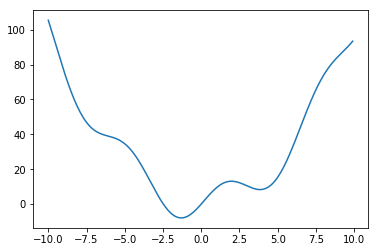

In [18]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)

plt.plot(x, f(x))

plt.show()

该函数在大约在 -1.3 有个全局最小值,在 3.8 有个局部最小值。

找到这个函数最小值一般而有效的方法是从初始点使用梯度下降法。BFGS 算法^1是做这个的好方法：

In [19]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

这个方法的一个可能的问题在于，如果函数有局部最小值，算法会因初始点不同而找到这些局部最小而不是全局最小：

In [20]:
optimize.fmin_bfgs(f, 3, disp=0)

array([ 3.83746709])

如果我们不知道全局最小值的邻近值来选定初始点，我们需要借助于耗费资源些的全局优化。为了找到全局最小点，最简单的算法是蛮力算法^2，该算法求出给定格点的每个函数值。

In [21]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

对于大点的格点，scipy.optimize.brute()变得非常慢。scipy.optimize.anneal()提供了使用模拟退火的替代函数。对已知的不同类别全局优化问题存在更有效率的算法，但这已经超出scipy的范围。一些有用全局优化软件包是OpenOpt、IPOPT、PyGMO和PyEvolve。

为了找到局部最小，我们把变量限制在(0, 10)之间，使用scipy.optimize.fminbound():

In [22]:
xmin_local = optimize.fminbound(f, 0, 10)
xmin_local

3.8374671194983834

注意：在高级章节部分数学优化：找到函数最小值中有关于寻找函数最小值更详细的讨论。

### 7.2、找到标量函数的根

为了寻找根，例如令f(x)=0的点，对以上的用来示例的函数f我们可以使用scipy.optimize.fsolve():

In [23]:
root = optimize.fsolve(f, 1)  # 我们的初始猜测是1
root

array([ 0.])

注意仅仅一个根被找到。检查f的图像在-2.5附近有第二个根。我们可以通过调整我们的初始猜测找到这一确切值：

In [24]:
root = optimize.fsolve(f, -2.5)
root

array([-2.47948183])

### 7.3、曲线拟合

假设我们有从被噪声污染的 f 中抽样到的数据：

In [25]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

如果我们知道函数形式(当前情况是 $x^2 + sin(x)$ )，但是不知道幅度。我们可以通过最小二乘拟合拟合来找到幅度。首先我们定义一个用来拟合的函数：

In [27]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

然后我们可以使用scipy.optimize.curve_fit()来找到a和b：

In [28]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 0.99832491,  9.53550393])

现在我们找到了f的最小值和根并且对它使用了曲线拟合。我们将一切放在一个单独的图像中:

注意：Scipy>=0.11中提供所有最小化和根寻找算法的统一接口scipy.optimize.minimize(),scipy.optimize.minimize_scalar()和scipy.optimize.root()。它们允许通过method关键字方便地比较不同算法。

你可以在scipy.optimize中找到用来解决多维问题的相同功能的算法。

## 8、统计和随机数：scipy.stats

scipy.stats包括统计工具和随机过程的概率过程。各个随机过程的随机数生成器可以从numpy.random中找到。

### 8.1、直方图和概率密度函数

给定一个随机过程的观察值，它们的直方图是随机过程的pdf(概率密度函数)的估计器：

In [29]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [30]:
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

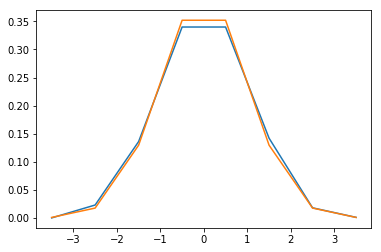

In [31]:
from scipy import stats
b = stats.norm.pdf(bins)  # norm是正态分布
import matplotlib.pyplot as plt
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

如果我们知道随机过程属于给定的随机过程族，比如正态过程。我们可以对观测值进行最大似然拟合来估计基本分布参数。这里我们对观测值拟合一个正态过程：

In [32]:
loc, std = stats.norm.fit(a)
loc

0.0064506812640936018

In [33]:
std

0.99716697804856214

### 8.2、百分位

中位数是来观测值之下一半之上一半的值。

In [34]:
np.median(a)

0.0026249135268202276

它也被叫作50百分位点，因为有50%的观测值在它之下：

In [35]:
stats.scoreatpercentile(a, 50)

0.0026249135268202276

同样我们可以计算百分之九十百分点：

In [36]:
stats.scoreatpercentile(a, 90)

1.2870817602094984

百分位是CDF的一个估计器(累积分布函数)。

### 8.3、统计检测

统计检测是决策指示。例如，我们有两个样本集，我们假设它们由高斯过程生成。我们可以使用T检验来决定是否两个样本值显著不同：

In [37]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.5587205487517544, pvalue=0.011890897114419088)

输出结果由以下部分组成：

 - T统计量：它是这么一种标志，与不同两个随机过程之间成比例并且幅度和差异的显著程度有关^3。
 - p值：两个过程相同的概率。如果接近1,这两个过程是几乎完全相同的。越靠近零，两个过程越可能有不同的均值。
 
## 9、插值：scipy.interplate

scipy.interpolate对从实验数据拟合函数来求值没有测量值存在的点非常有用。这个模块基于来自netlib项目的FITPACK Fortran 子程序。

通过想象接近正弦函数的实验数据：

In [38]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

scipy.interpolate.interp1d类会构建线性插值函数：

In [39]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

然后scipy.interpolate.linear_interp实例需要被用来求得感兴趣时间点的值：

In [40]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

三次插值也能通过提供可选关键字参数kind来选择：[^4]

In [41]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

scipy.interpolate.interp2d与scipy.interpolate.interp1d相似，但是面向二维数组。注意，对interp族，计算时间必须在测量时间范围内。参见Maximum wind speed prediction at the Sprogø station的总结练习获得更高级的插值示例。

## 10、数值积分：scipy.integrate Fusy

最通用的积分程序是scipy.integrate.quad():

In [42]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

True

In [43]:
np.allclose(err, 1 - res)

True

其它可用的积分方案有fixed_quad, quadrature, romberg。

scipy.integrate也是用来积分常微分方程(ODE)的功能程序。特别是，scipy.integrate.odeint()是个使用LSODA(Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems)通用积分器。参见ODEPACK Fortran library获得更多细节。

odeint解决这种形式的一阶ODE系统：

```
dy/dt = rhs(y1, y2, ... ,t0, ...)
```

作为简介，让我们解决ODEdy/dt = -2y,区间t = 0..4,初始条件y(t=0) = 1。首先函数计算导数的位置需要被定义

In [44]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

一个额外的参数counter_arr被添加，用来说明函数可能在单个时间步中被多次调用，直到解收敛。计数数组被定义成：

In [45]:
counter = np.zeros((1,), dtype=np.uint16)

弹道将被计算：

In [47]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec,args=(counter,), full_output=True)

因此导函数可以被调用40次(即时间步长数)

In [48]:
counter

array([129], dtype=uint16)

十个最初的时间点(time step)每个的累积迭代次数，可以这样获得：

In [49]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

注意到在第一个时间步的解需要更多的迭代。解yvec的轨道现在可以被画出：

另一个使用scipy.integrate.odeint()的例子是一个阻尼弹簧-质点振荡器(二阶振荡)。附加在弹簧上质点的位置服从二阶常微分方程y'' + eps wo y' + wo^2 y= 0。其中wo^2 = k/m,k是弹簧常数，m是质量，eps=c/(2 m wo)，c是阻尼系数。(译者：为什么不用latex……)对于这个例子，我们选择如下参数：

In [50]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

所以系统将是阻尼振荡，因为:

In [51]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
eps < 1

True

对于scipy,integrate.odeint()求解器，二阶方程需要被转化成一个包含向量Y =y,y'的两个一阶方程的系统。定义nu = 2 eps * wo = c / m和om = wo^2 = k/m很方便：

In [52]:
nu_coef = cviscous /mass
om_coef = kspring / mass

因此函数将计算速度和加速度通过：

In [53]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])

time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

Scipy中不存在偏微分方程(PDE)求解器,一些解决PDE问题的Python软件包可以得到，像fipy和SfePy 。

## 11、信号处理：scipy.signal

In [54]:
from scipy import signal

scipy.signal.detrend()：移除信号的线性趋势：

In [59]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)
import pylab as pl
pl.plot(t, x, linewidth=3)
pl.plot(t, signal.detrend(x), linewidth=3)

scipy.signal.resample():使用FFT重采样n个点。

In [60]:
t = np.linspace(0, 5, 100)
x = np.sin(t)
pl.plot(t, x, linewidth=3)
pl.plot(t[::2], signal.resample(x, 50), 'ko')

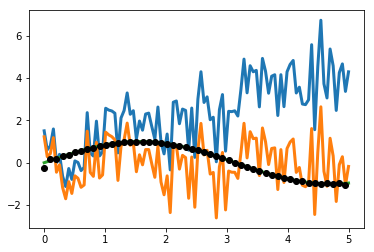

In [61]:
pl.show()

 - Signal中有许多窗函数：scipy.signal.hamming(), scipy.signal.bartlett(), scipy.signal.blackman()…
 - Signal中有滤波器(中值滤波scipy.signal.medfilt(), 维纳滤波scipy.signal.wiener())，但是我们将在图像部分讨论。
 
## 12、图像处理：scipy.ndimage

scipy中致力于图像处理的子模块是scipy,ndimage。

In [62]:
from scipy import ndimage

图像处理程序可以根据它们执行的操作类别来分类。

### 12.1、图像的几何变换:

改变方向，分辨率等

In [67]:
from scipy import misc
lena = misc.lena()
shifted_lena = ndimage.shift(lena, (50, 50))
shifted_lena2 = ndimage.shift(lena, (50, 50), mode='nearest')
rotated_lena = ndimage.rotate(lena, 30)
cropped_lena = lena[50:-50, 50:-50]
zoomed_lena = ndimage.zoom(lena, 2)
zoomed_lena.shape

RuntimeError: lena() is no longer included in SciPy, please use ascent() or face() instead

提示已经 lena() 不存在 scipy 中啦。算了，我这儿就不换了，你们可以按照提示信息换一下。

In [68]:
pl.subplot(321)
pl.imshow(lena, cmap=cm.gray)
pl.subplot(322)

NameError: name 'lena' is not defined

### 12.2、图像滤镜

In [69]:
from scipy import misc
lena = misc.lena()
import numpy as np
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
from scipy import signal
wiener_lena = signal.wiener(blurred_lena, (5,5))

RuntimeError: lena() is no longer included in SciPy, please use ascent() or face() instead

许多其它scipy.ndimage.filters和scipy.signal中的滤镜可以被应用到图像中。

### 12.3、数学形态学

数学形态学是源于几何论的数学形态学。它具有结合结构的特点并变换几何结构。二值图(黑白图)，特别能被用该理论转换：要转换的集合是邻近的非零值像素。这个理论也被拓展到灰度图中。

基本的数学形态操作使用一个结构元素(structuring element)来改变其它几何结构。

让我们首先生成一个结构元素：

In [71]:
el = ndimage.generate_binary_structure(2, 1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]], dtype=bool)

In [72]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [73]:
# 腐蚀
a = np.zeros((7,7), dtype=int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [74]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [75]:
# 腐蚀移除对象使结构更小
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [76]:
# 膨胀
a = np.zeros((5,5))
a[2, 2] = 1
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [77]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [78]:
# 开操作（opening）
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [79]:
# 开操作可以移除小的对象
ndimage.binary_opening(a, structure=np.ones((3,3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [80]:
# 开操作也能平滑边角
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

闭操作（closing）：ndimage.binary_closing

### 12.4、图像测量

让我们首先生成一个漂亮的合成图像：

In [81]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask = sig > 1

# 现在我们查找图像中对象的各种信息：
labels, nb = ndimage.label(mask)
nb

8

In [86]:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas

array([ 190.,   45.,  424.,  278.,  459.,  190.,  549.,  424.])

In [88]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima

array([  1.80238238,   1.13527605,   5.51954079,   2.49611818,
         6.71673619,   1.80238238,  16.76547217,   5.51954079])

In [89]:
ndimage.find_objects(labels==4)

[(slice(30, 48, None), slice(30, 48, None))]

In [91]:
sl = ndimage.find_objects(labels==4)
import pylab as pl
pl.imshow(sig[sl[0]])

## 13、小结

这样就差不多啦。虽然不是太是很清楚，也差不多有个大概的印象了。

接下来多练习使用 NumPy ，SciPy 和 Matplotlib。然后就可以为所欲为了。